### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient_68 = pd.read_csv('Patient 68_data.csv')

In [3]:
patient_68.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000,...,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000
mean,0.034562,0.322424,0.504245,0.922460,1.933272,6.810457,1.225185,1.056640,1.027833,1.011198,...,1.905449,1.842420,1.673318,2.051662,0.892835,1.739943,1.965410,2.063893,1.918600,42.062765
std,0.009056,0.019343,0.016889,0.031238,0.022866,20.559655,0.196452,0.059458,0.009422,0.006447,...,0.025201,0.023689,0.055062,0.034708,0.056061,0.036844,0.028027,0.024068,0.018084,22.046672
min,0.002491,0.247741,0.477717,0.889423,1.866776,2.391268,1.091523,1.016581,1.000213,0.998307,...,1.209373,1.327947,1.253792,1.292709,0.390959,1.011640,1.186889,1.301295,1.377031,21.000000
25%,0.030273,0.315878,0.493523,0.900152,1.919990,3.573572,1.112922,1.025670,1.022144,1.004363,...,1.899161,1.831074,1.639713,2.050312,0.881661,1.738074,1.959735,2.065109,1.914454,28.700000
50%,0.032882,0.329799,0.498773,0.907100,1.924926,3.944363,1.121350,1.027927,1.023220,1.014381,...,1.905689,1.839485,1.657118,2.062528,0.900487,1.748919,1.964579,2.066059,1.919751,32.400000
75%,0.035930,0.334959,0.507652,0.960036,1.955218,5.430251,1.262853,1.076428,1.029779,1.015960,...,1.913414,1.849007,1.681682,2.066994,0.918314,1.756039,1.973172,2.066648,1.925297,38.600000
max,0.087159,0.365463,0.576032,1.017641,1.992040,485.860891,2.499042,1.371188,1.066792,1.024474,...,1.951655,1.965656,1.871699,2.075770,0.996229,1.797571,2.017511,2.068751,1.948181,97.600000


In [4]:
X=patient_68.drop('BIS', axis=1)
y= patient_68['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

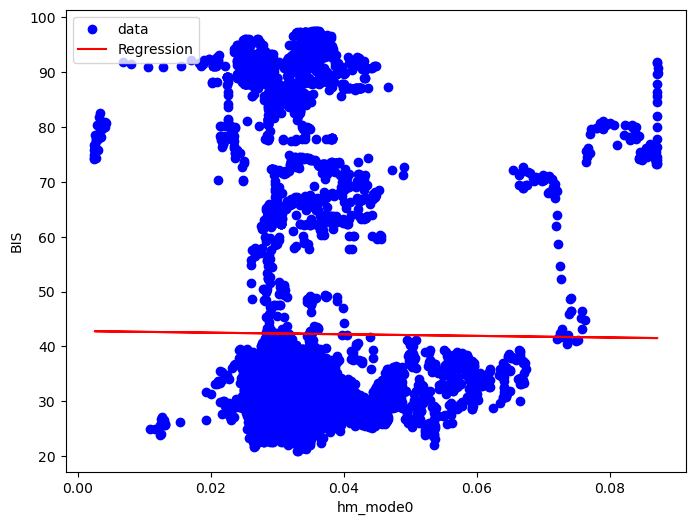

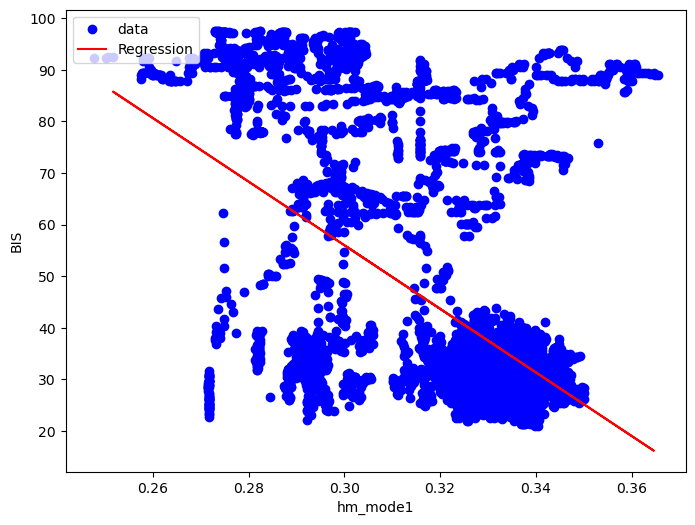

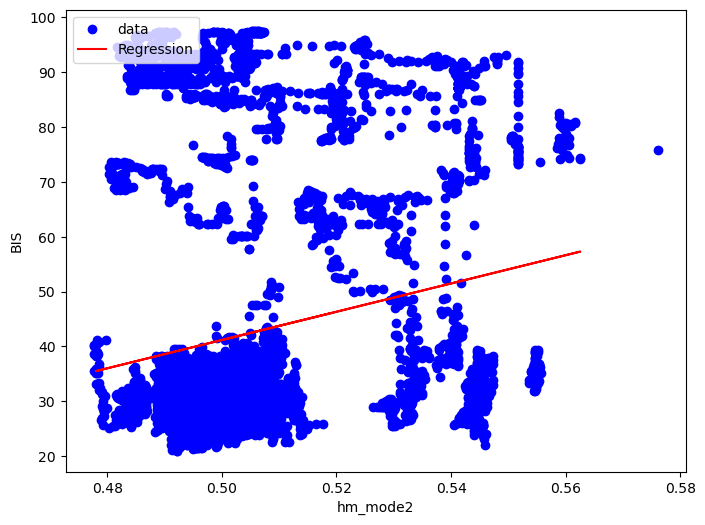

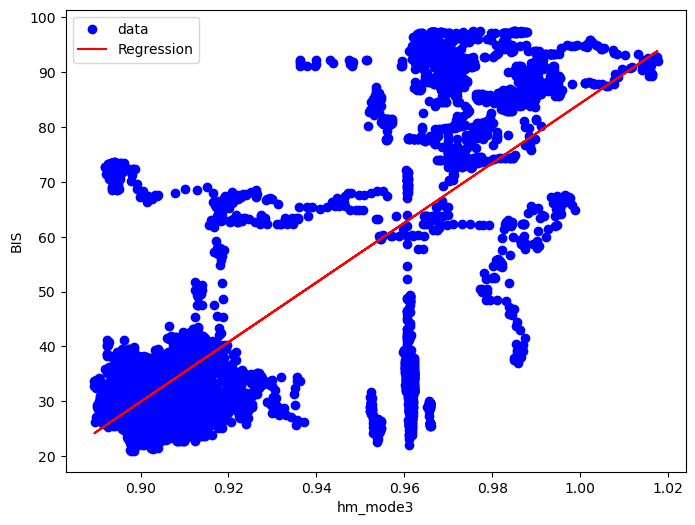

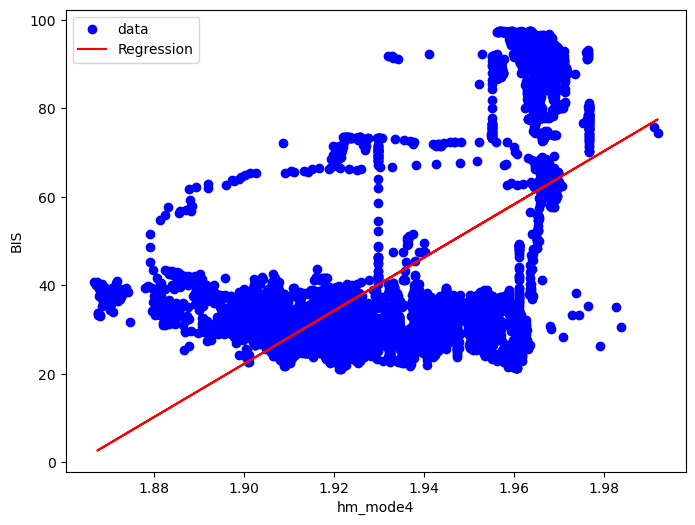

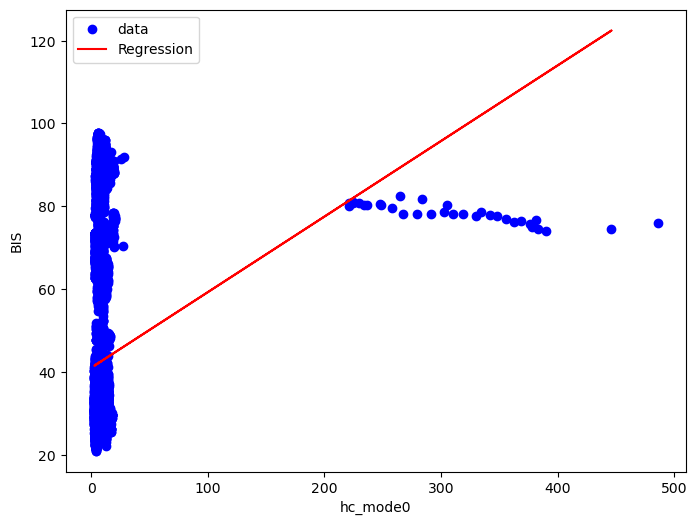

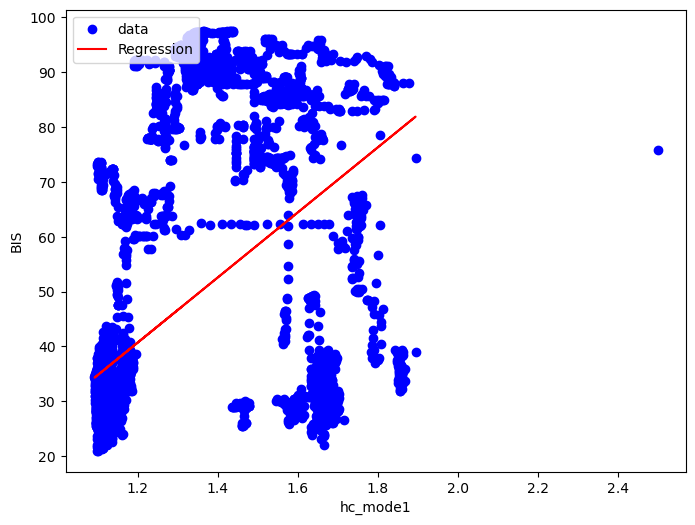

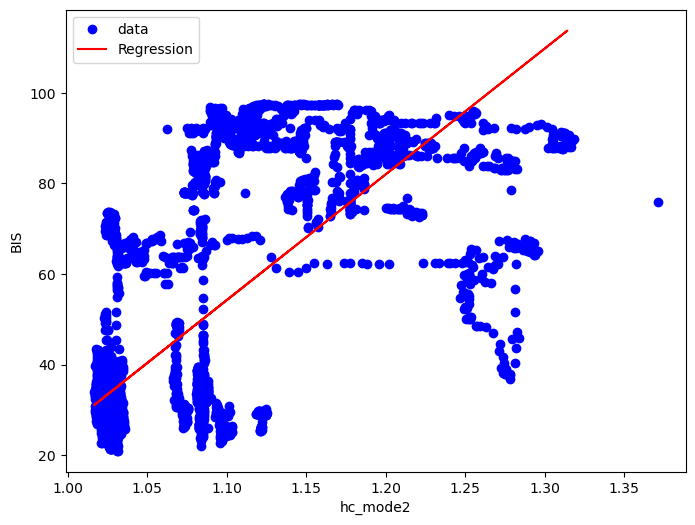

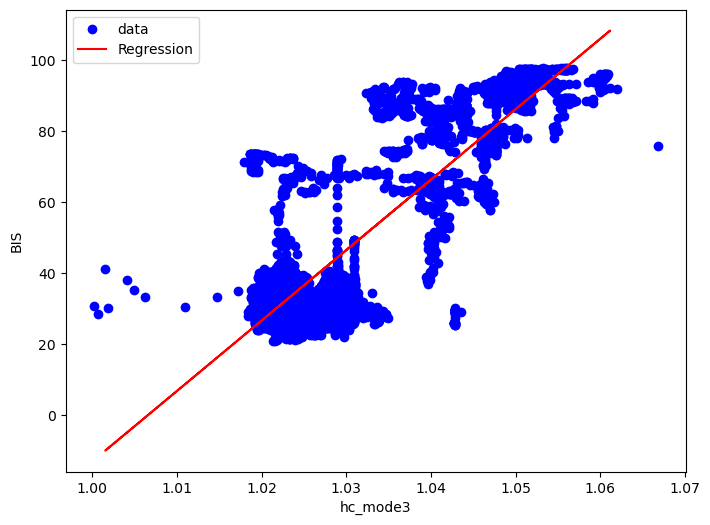

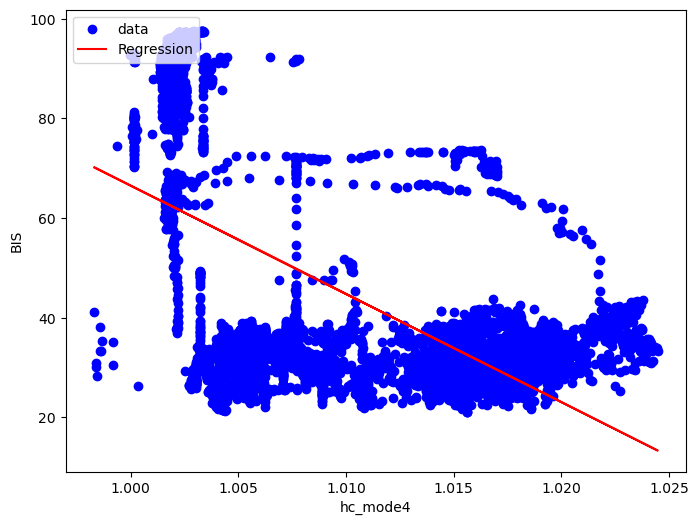

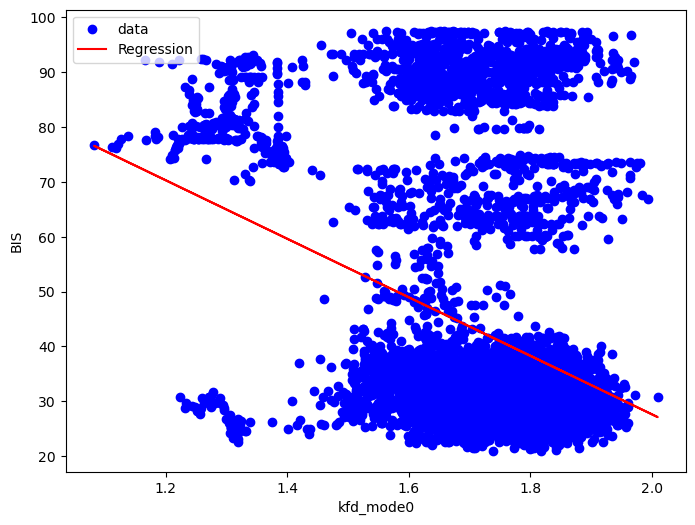

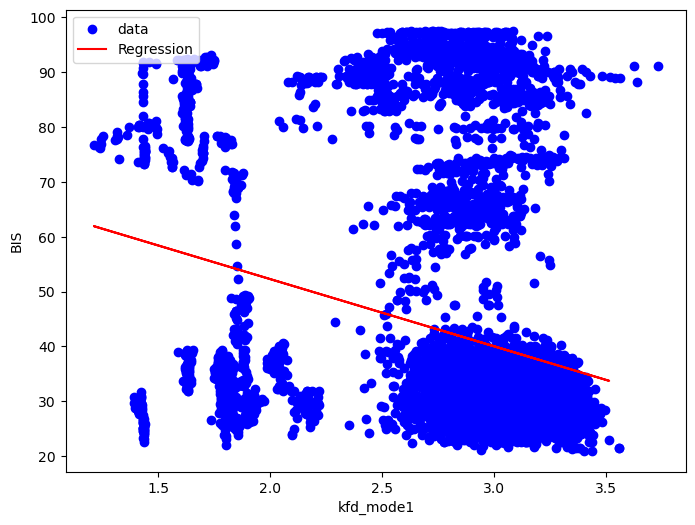

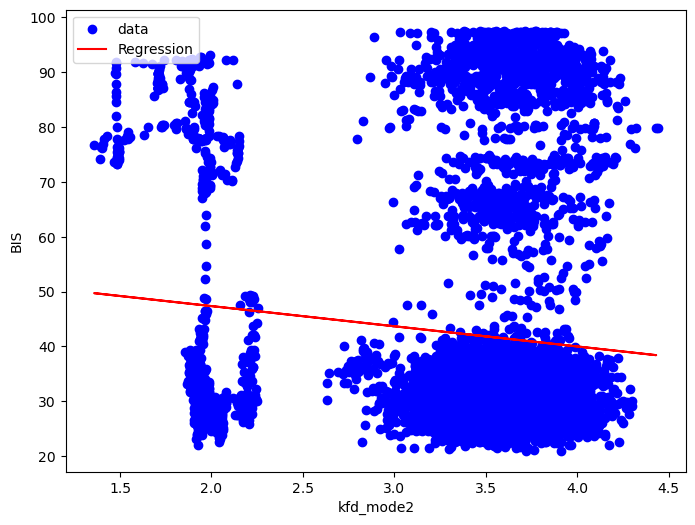

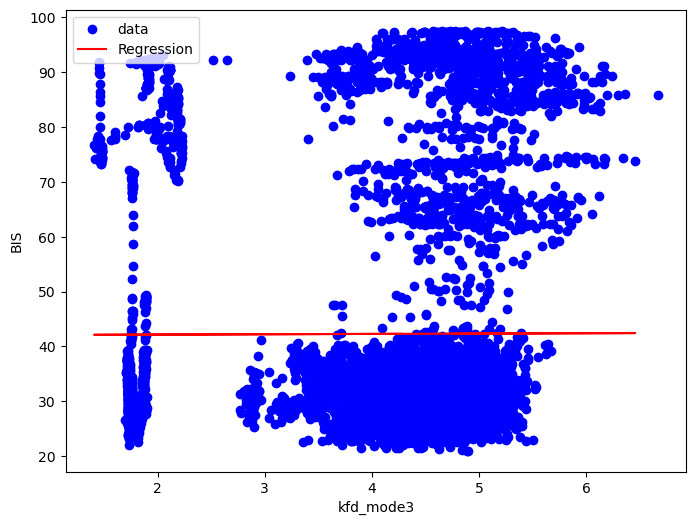

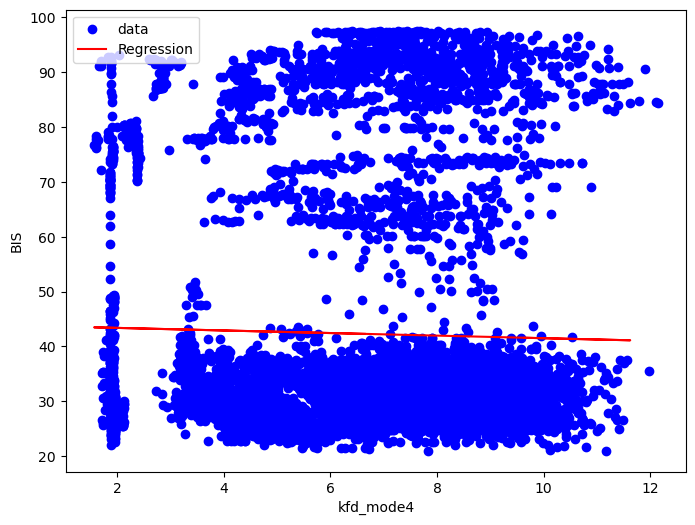

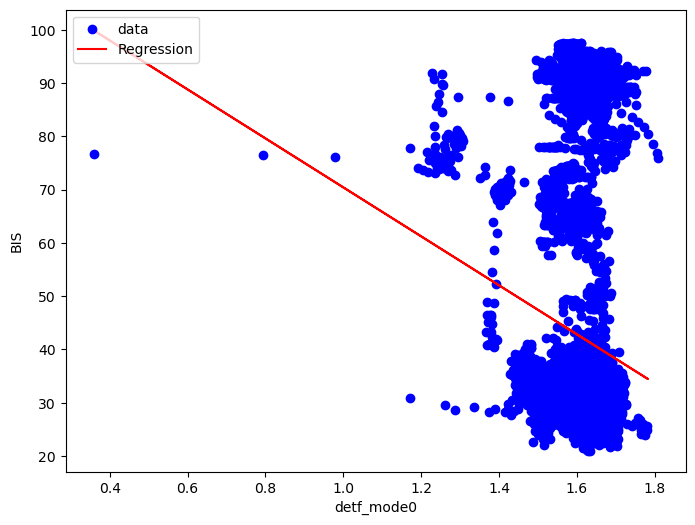

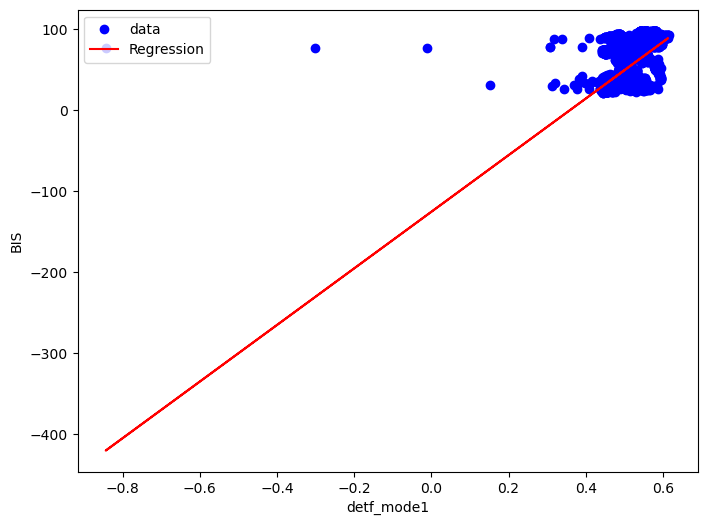

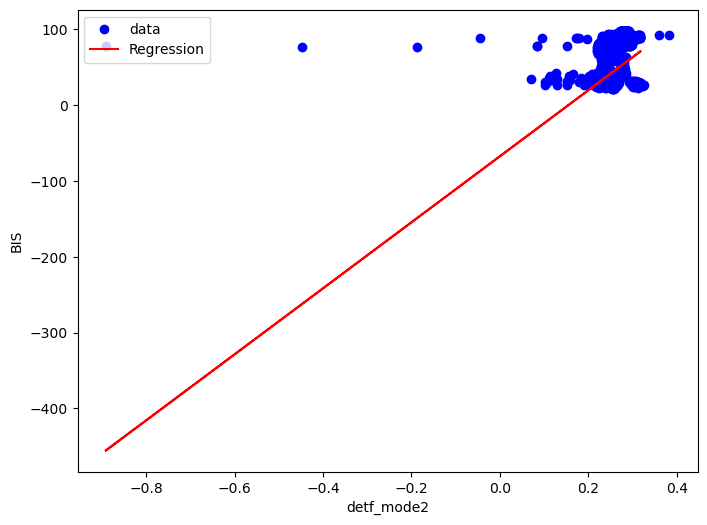

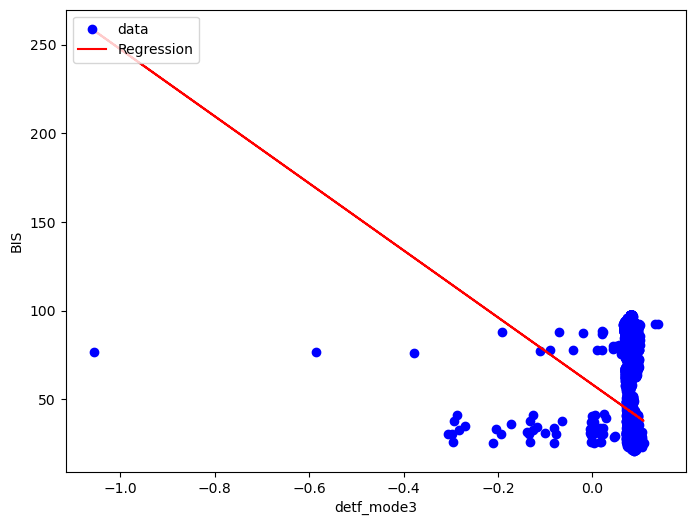

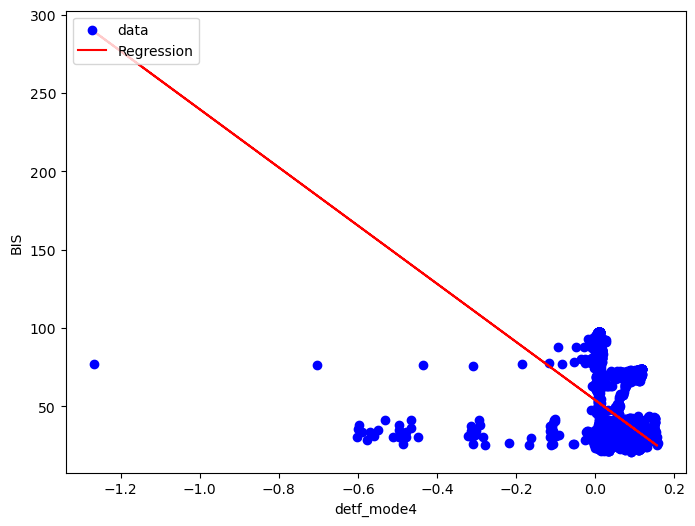

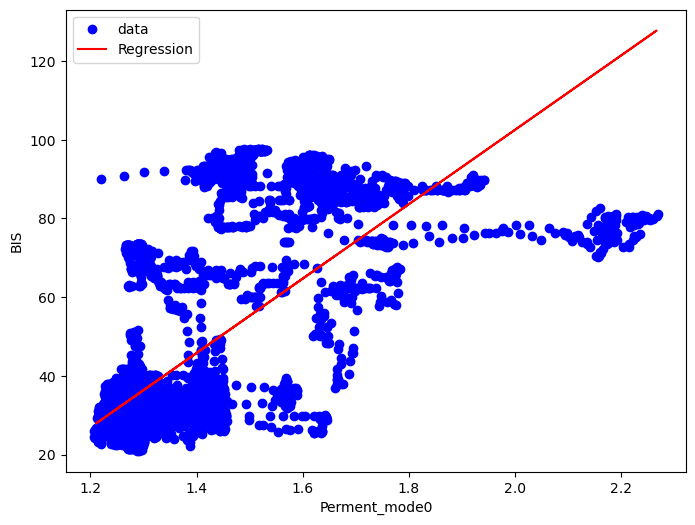

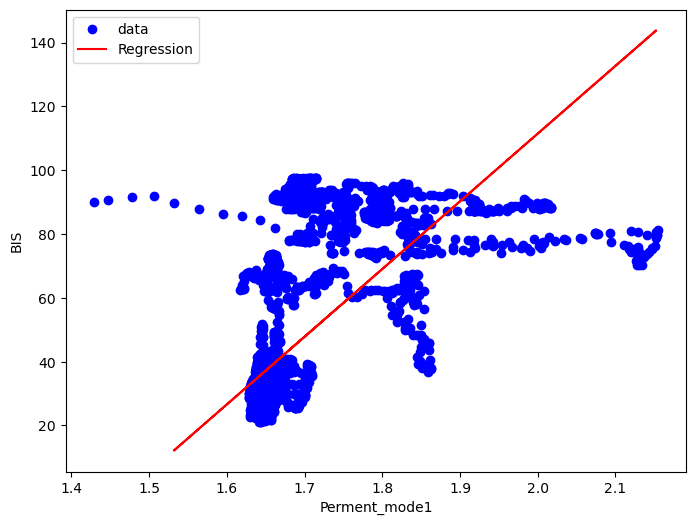

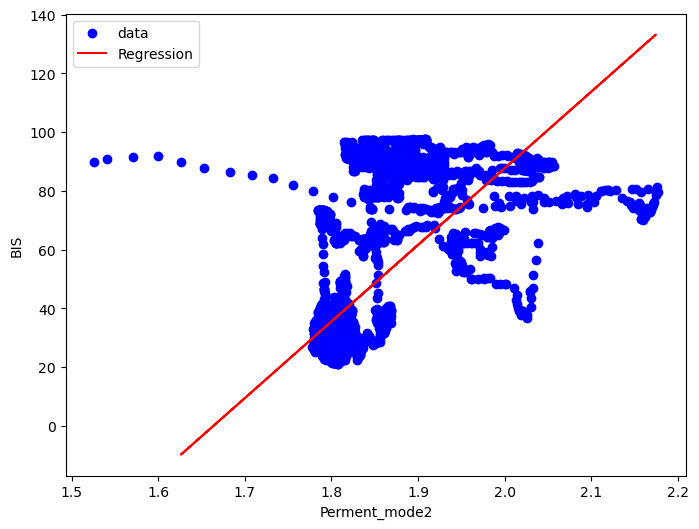

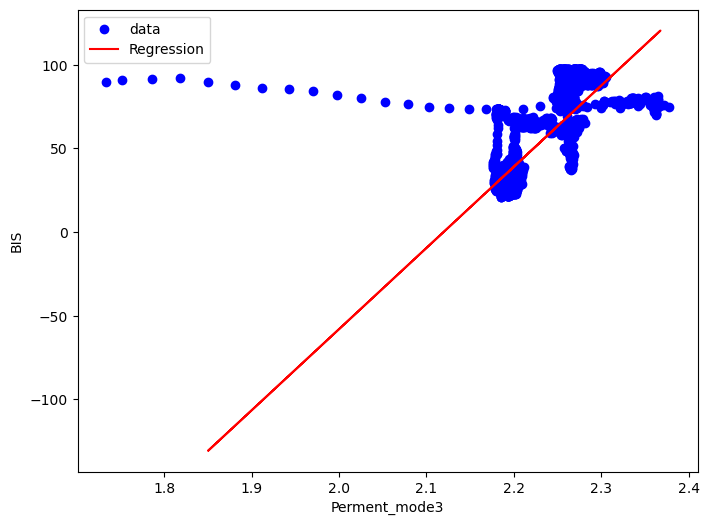

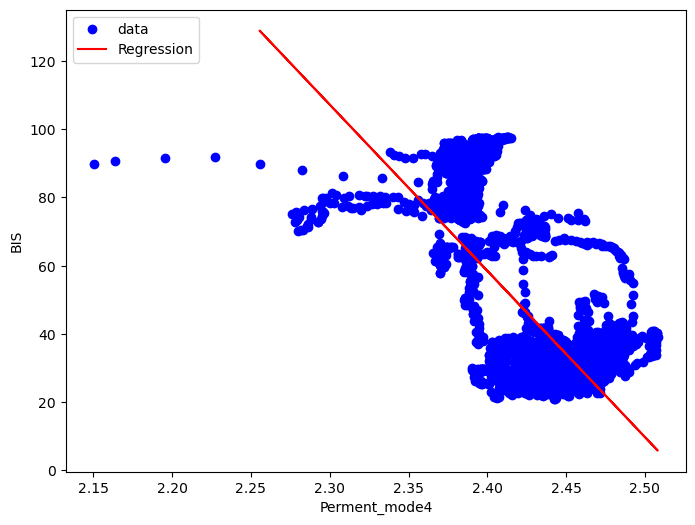

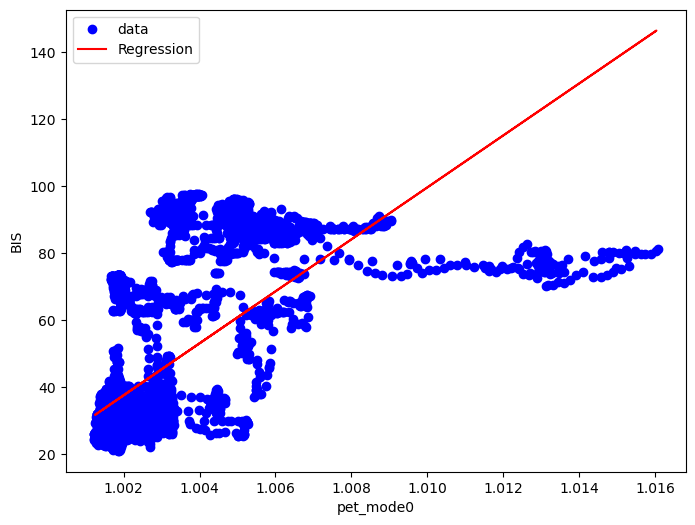

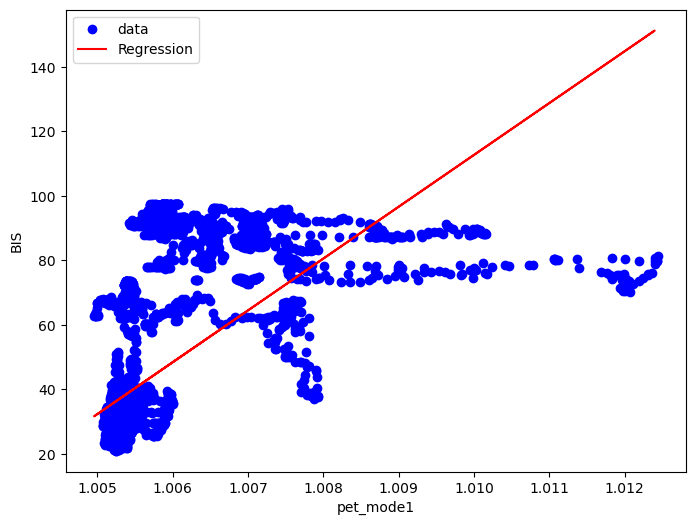

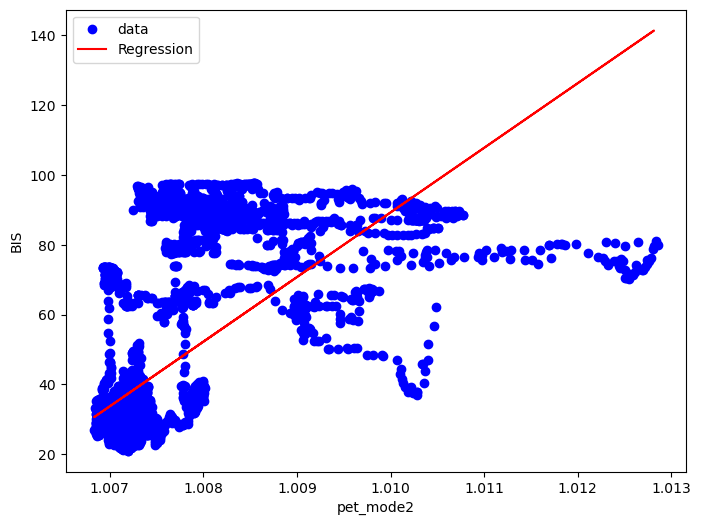

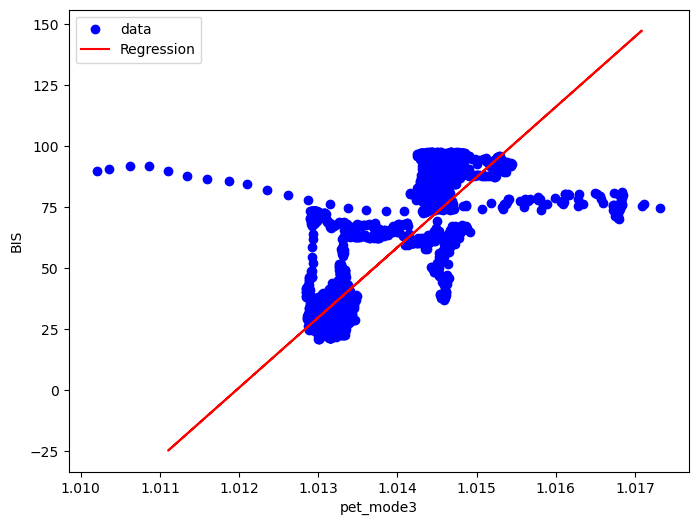

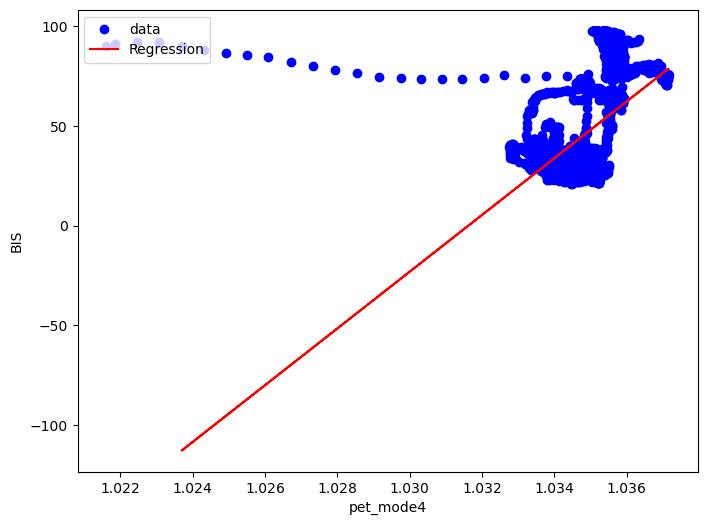

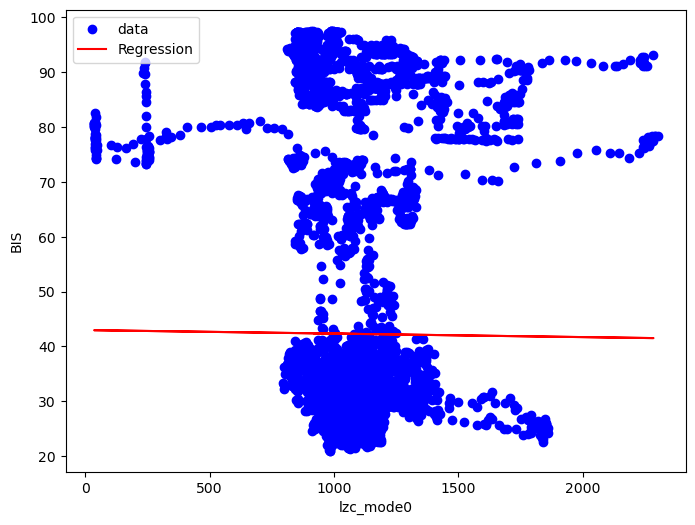

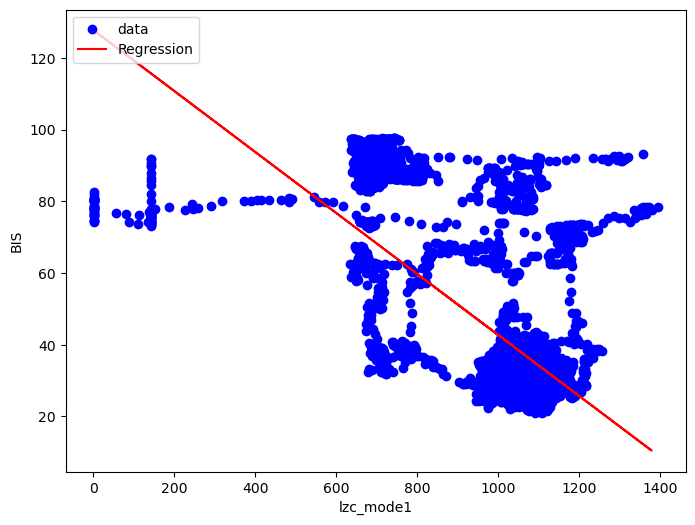

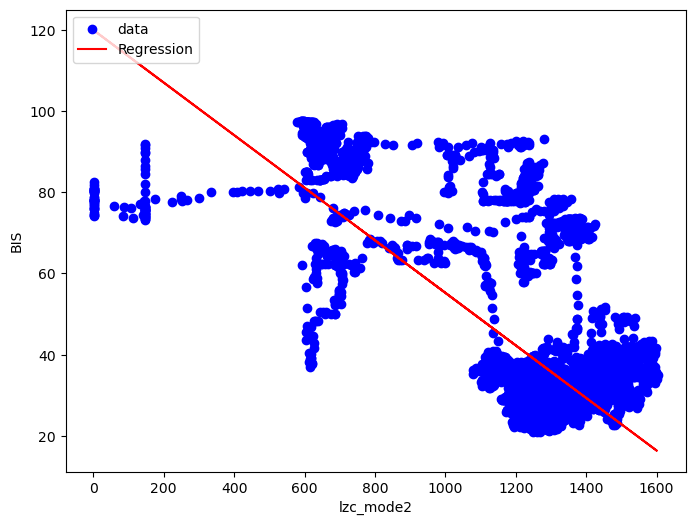

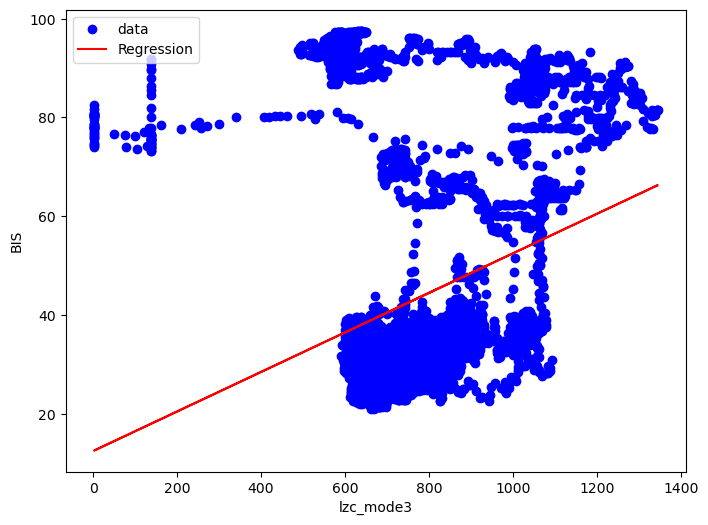

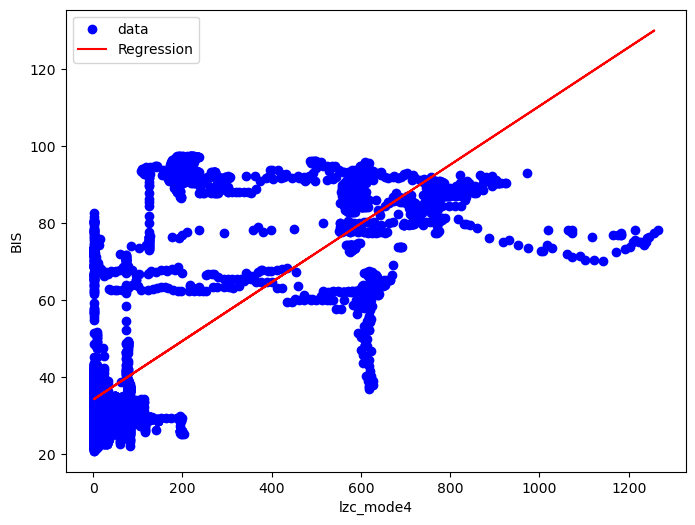

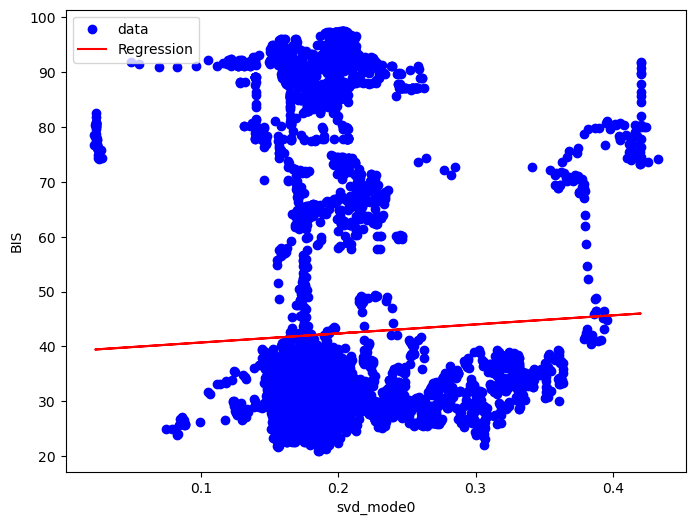

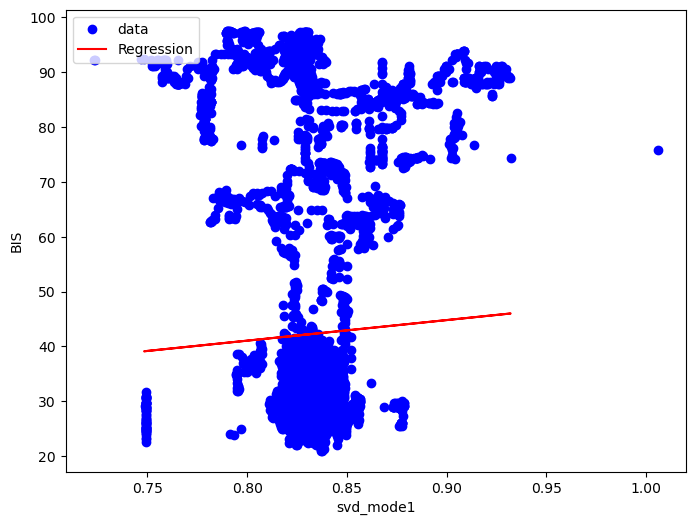

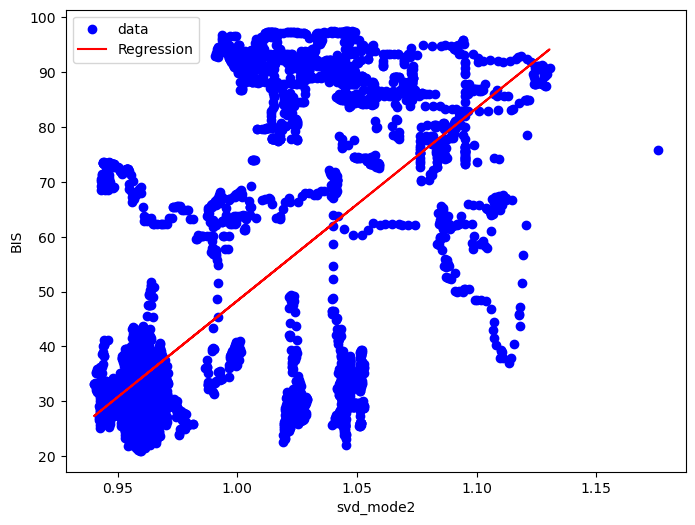

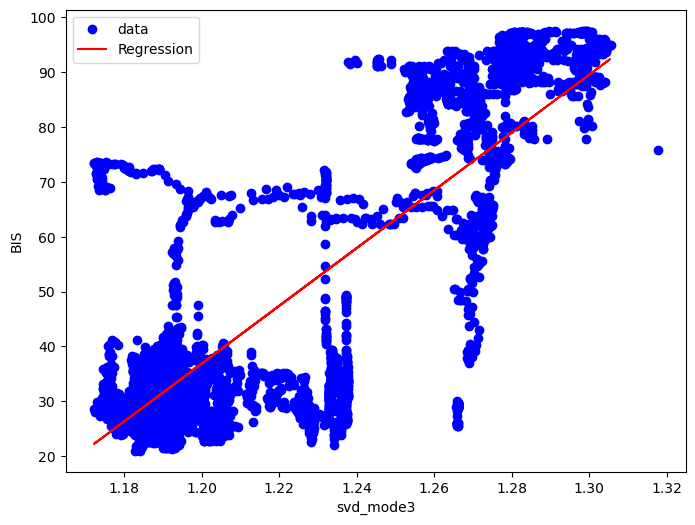

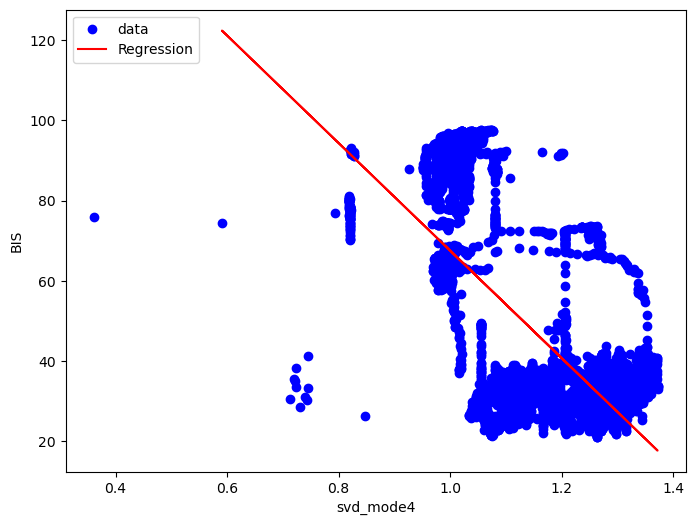

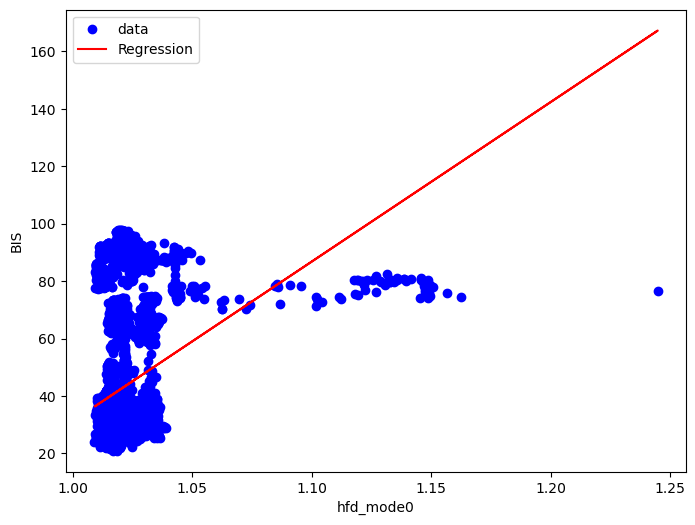

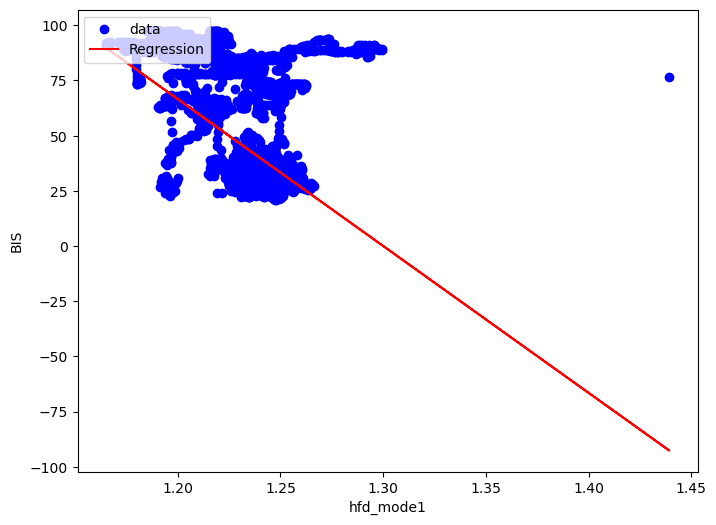

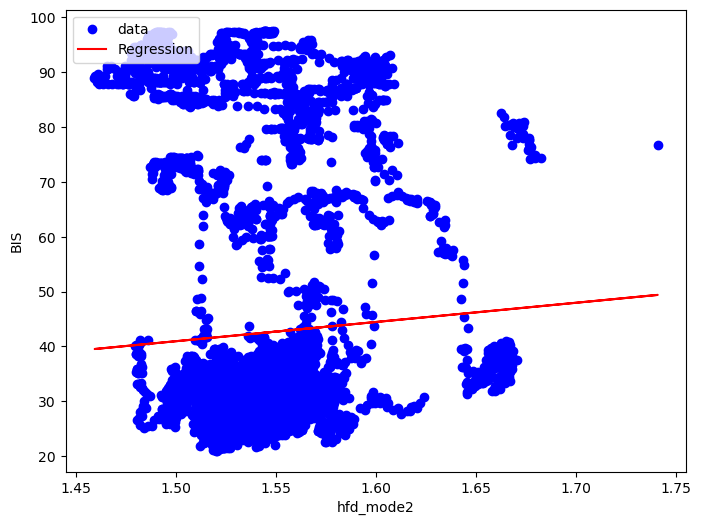

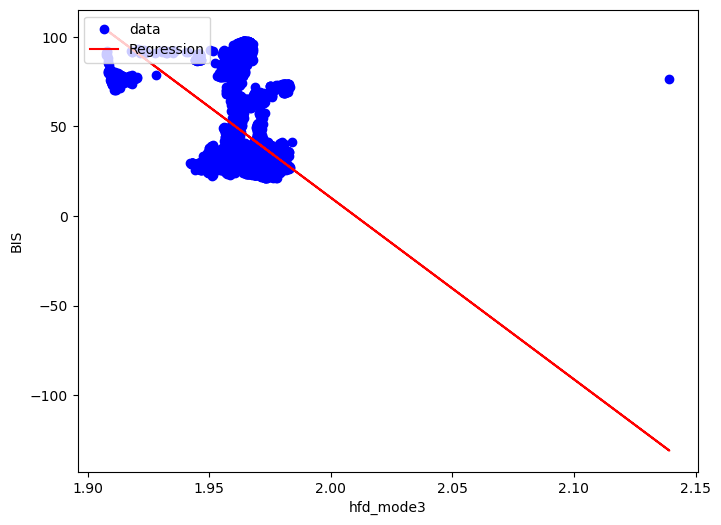

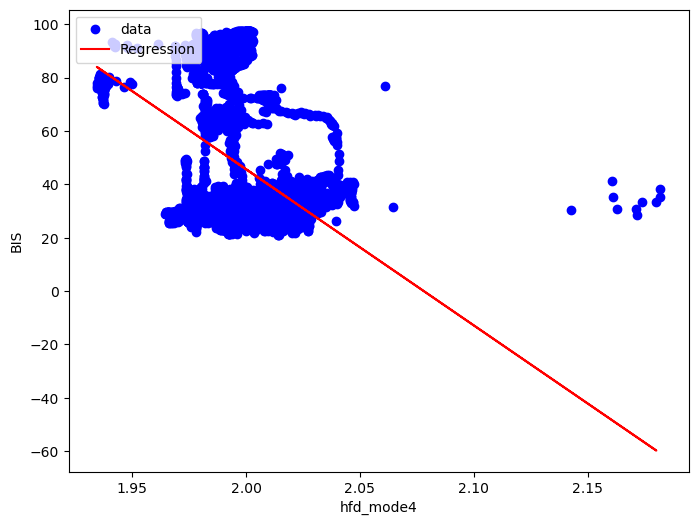

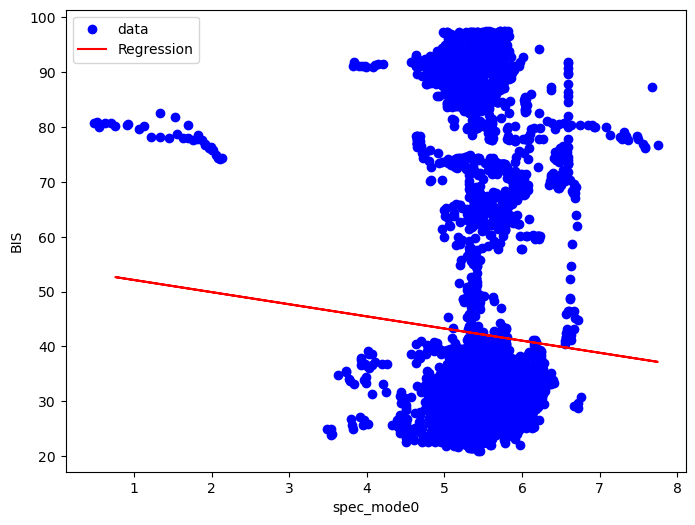

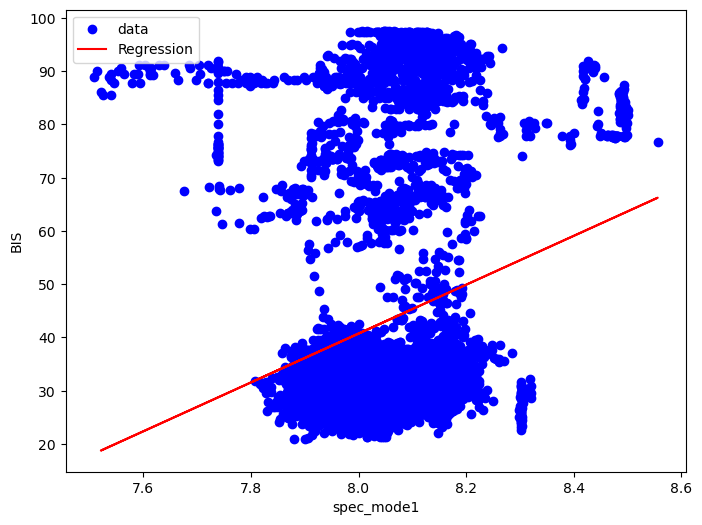

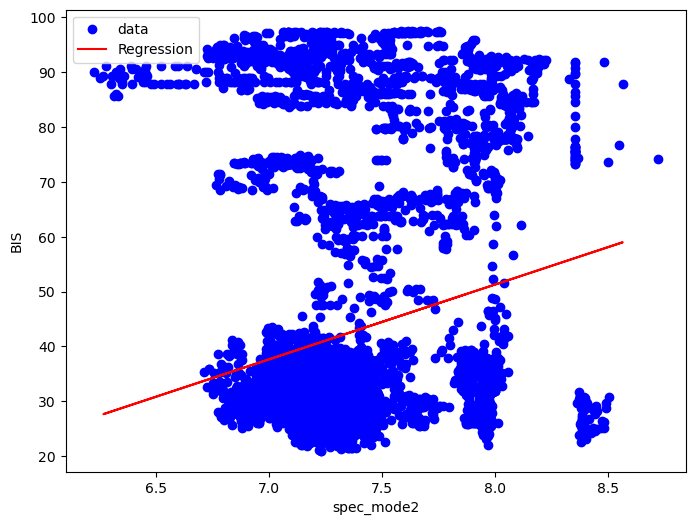

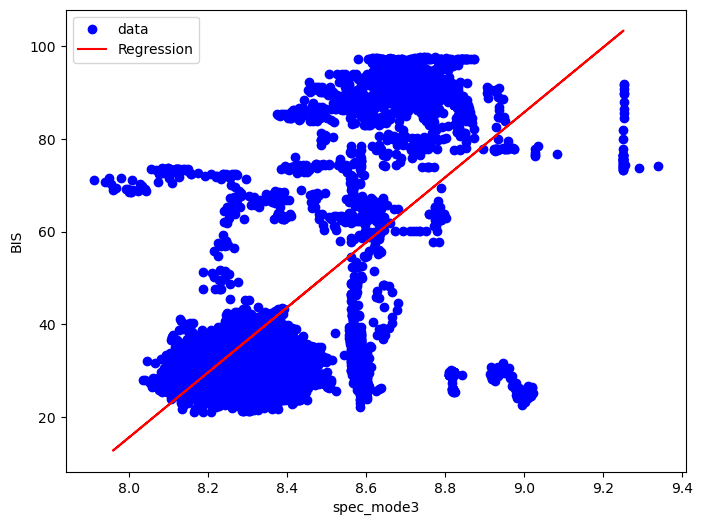

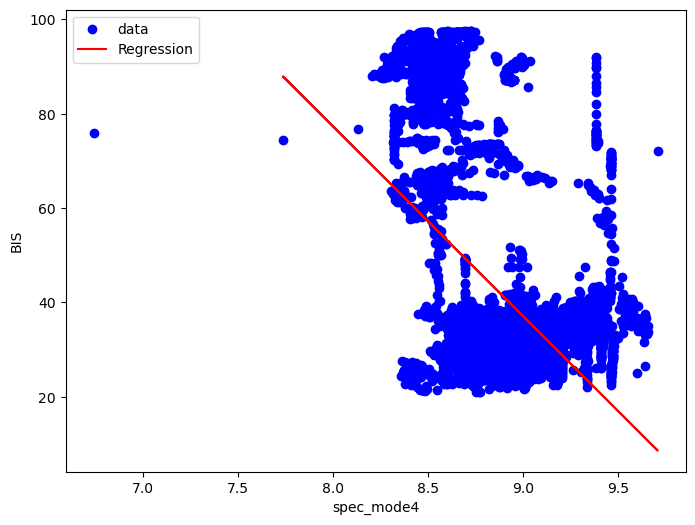

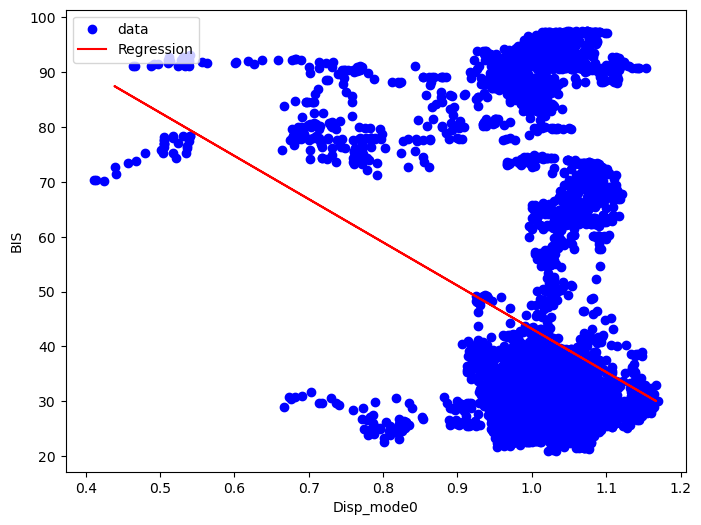

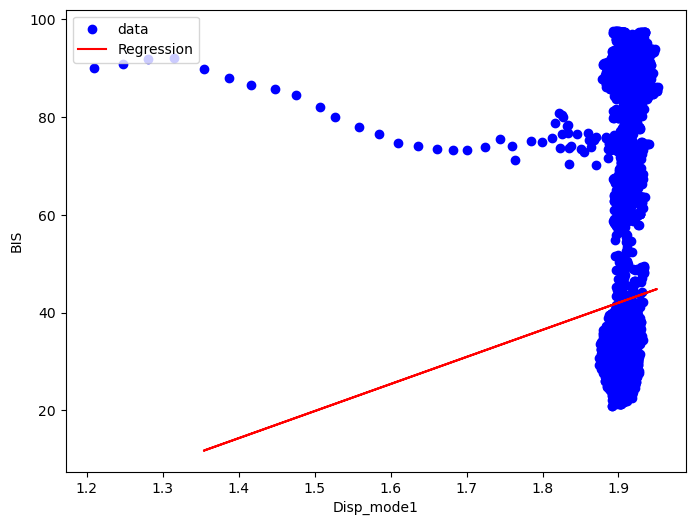

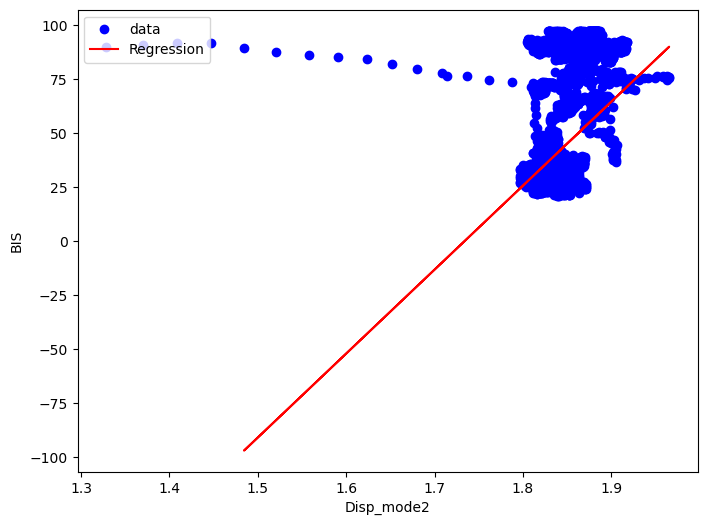

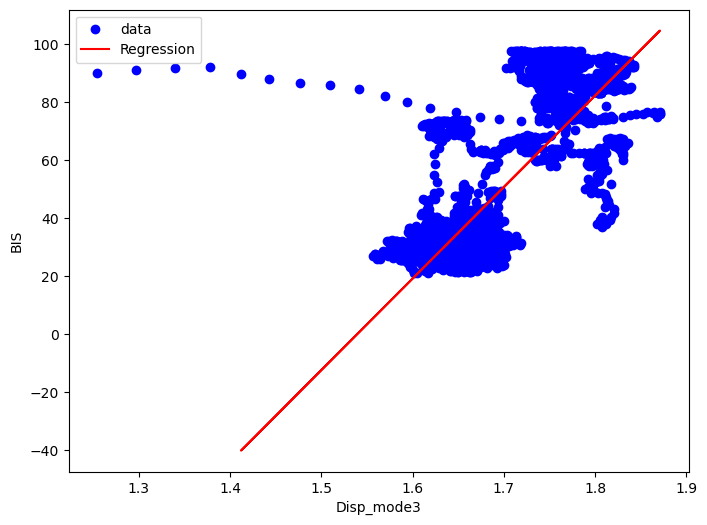

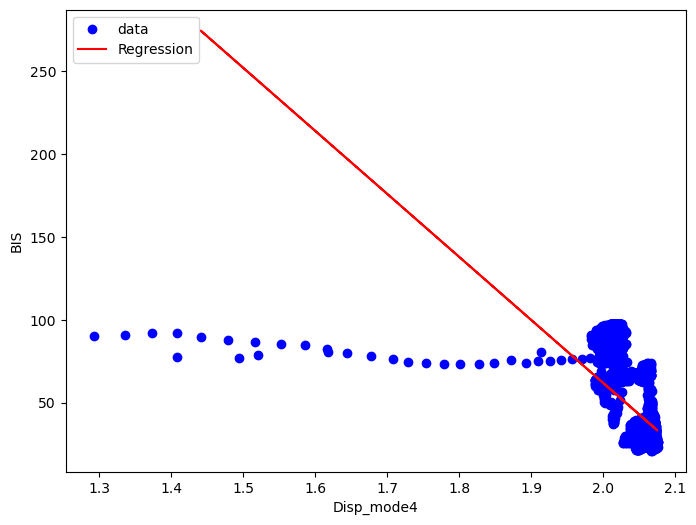

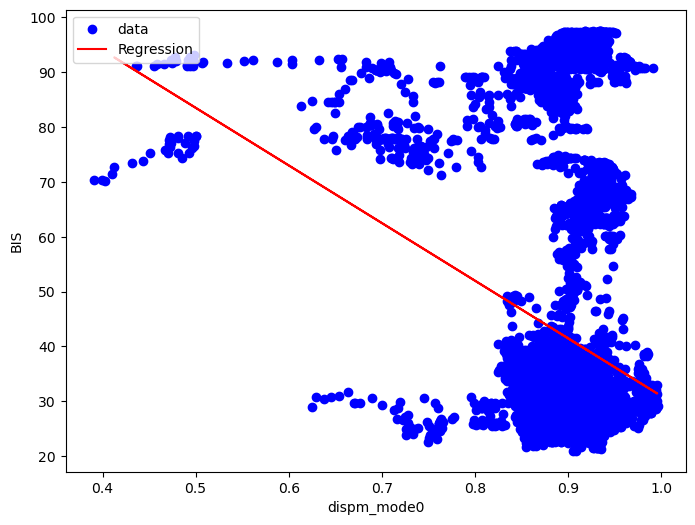

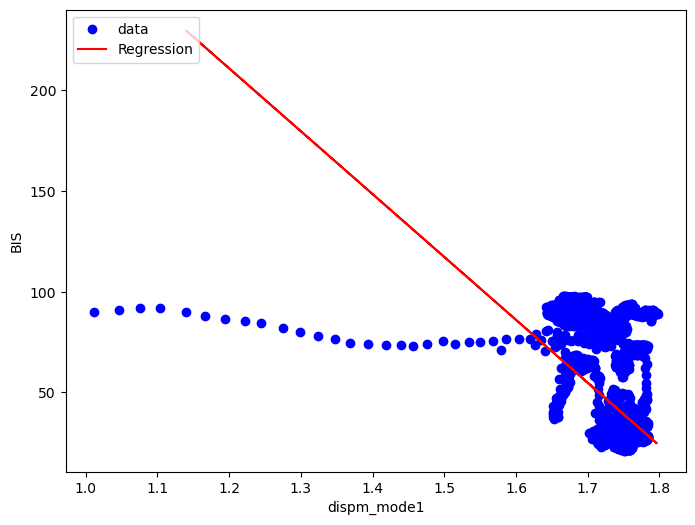

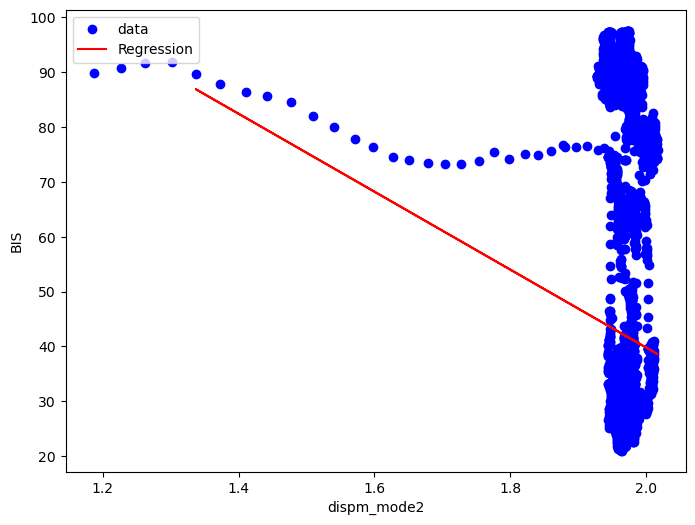

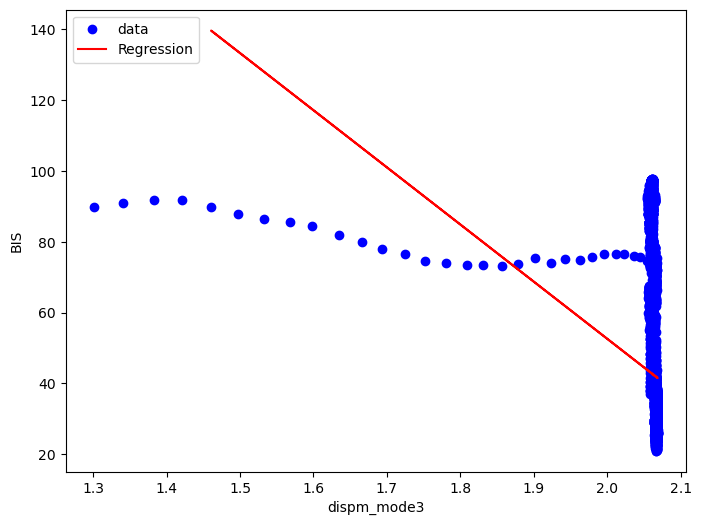

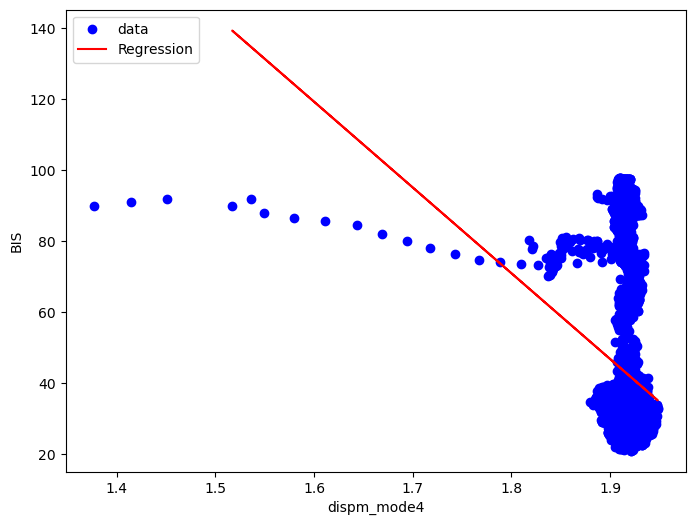

In [6]:

for column in patient_68.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient_68, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
8,hc_mode3_r2,73.271295
38,svd_mode3_r2,71.428699
28,pet_mode3_r2,70.660860
53,Disp_mode3_r2,62.553359
32,lzc_mode2_r2,62.516859
23,Perment_mode3_r2,61.618958
3,hm_mode3_r2,60.467452
7,hc_mode2_r2,55.537240
34,lzc_mode4_r2,55.283116
39,svd_mode4_r2,51.339315


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
28      pet_mode3    0.684481
54     Disp_mode4    0.126325
31      lzc_mode1    0.021919
5        hc_mode0    0.018057
23  Perment_mode3    0.017943
8        hc_mode3    0.015321
55    dispm_mode0    0.011015
56    dispm_mode1    0.010622
53     Disp_mode3    0.010572
33      lzc_mode3    0.006476
32      lzc_mode2    0.005646
0        hm_mode0    0.005527
38      svd_mode3    0.004876
18     detf_mode3    0.003568
15     detf_mode0    0.003507
50     Disp_mode0    0.003437
6        hc_mode1    0.003319
44      hfd_mode4    0.003170
37      svd_mode2    0.002634
17     detf_mode2    0.002319
30      lzc_mode0    0.002071
42      hfd_mode2    0.002060
45     spec_mode0    0.001928
35      svd_mode0    0.001819
7        hc_mode2    0.001787
46     spec_mode1    0.001757
48     spec_mode3    0.001692
29      pet_mode4    0.001461
14      kfd_mode4    0.001454
3        hm_mode3    0.001396
51     Disp_mode1    0.001285
16     detf_mode1    0.001226
24  Permen